# Performance Metrics for Machine Learning Models

In this notebook, we will explore the key performance metrics used to evaluate machine learning models, particularly classification models.

### **Why We Need Each Type of Performance Measure**

In machine learning, evaluating the performance of a model is crucial for understanding how well it generalizes to unseen data. Different metrics provide insights into different aspects of a model's performance, especially in classification tasks where class imbalances or the cost of misclassification may differ. Here's why each measure is essential:

1. **Accuracy**:
   - Accuracy is a simple and intuitive metric — it tells us how often the model's predictions are correct. However, it can be misleading when dealing with imbalanced datasets (e.g., predicting the presence of a rare disease).
   - **When to use**: Best for balanced datasets, where the classes are equally represented.

2. **Precision**:
   - Precision measures the proportion of positive identifications (e.g., predicted "Yes") that are actually correct. It’s useful when **false positives** (predicting something as positive when it’s not) have a high cost, such as in spam detection.
   - **When to use**: When **false positives** are costly and should be minimized.

3. **Recall**:
   - Recall (also known as sensitivity or true positive rate) measures the proportion of actual positives that were correctly predicted. It’s crucial when **false negatives** (missing a positive case) have a high cost, such as in medical diagnoses (e.g., detecting cancer).
   - **When to use**: When **false negatives** are costly and should be minimized.

4. **F1-Score**:
   - The F1-Score is the harmonic mean of precision and recall, providing a balance between the two. It's particularly useful in scenarios where you need to strike a balance between precision and recall, such as when dealing with imbalanced datasets.
   - **When to use**: When you need a balance between precision and recall, especially when you care equally about avoiding both false positives and false negatives.

These metrics help us understand how well the model is performing and provide insight into different aspects of the model's behavior.

---



### **The Confusion Matrix**

A **Confusion Matrix** is a performance measurement tool for machine learning classification models. It is a square matrix that visualizes the performance of a classification model by comparing the actual (true) values with the predicted values made by the model. 

The matrix contains four key metrics:
- **True Positives (TP)**: Correctly predicted positive instances.
- **True Negatives (TN)**: Correctly predicted negative instances.
- **False Positives (FP)**: Incorrectly predicted positive instances (Type I error).
- **False Negatives (FN)**: Incorrectly predicted negative instances (Type II error).

---

### **Why is the Confusion Matrix Important?**

1. **Detailed Performance Analysis**:
   - Unlike a simple accuracy score, the confusion matrix provides detailed insight into the types of errors the model is making. It shows where the model gets things right and where it gets things wrong, which can help diagnose problems in the model's predictions.

2. **Class-Specific Performance**:
   - In a classification task, the confusion matrix breaks down performance per class. This is useful for detecting if a model is biased towards certain classes. For instance, in a dataset with imbalanced classes, accuracy alone can be misleading, but the confusion matrix can reveal whether one class is being predicted more often than others.

3. **Error Types**:
   - The confusion matrix highlights **false positives** (Type I errors) and **false negatives** (Type II errors). These errors can have different costs depending on the context (e.g., in medical diagnosis, a false negative might be more harmful than a false positive). Understanding the types of errors helps in choosing the right performance metrics (e.g., precision, recall, or F1-score).

4. **Evaluation of Imbalanced Datasets**:
   - When dealing with imbalanced datasets (e.g., fraud detection, medical diagnosis), accuracy alone is not a reliable metric because it can mask poor performance on the minority class. The confusion matrix helps break down how well the model is performing on each class separately, allowing for a deeper understanding of model behavior in skewed datasets.

5. **Calculation of Performance Metrics**:
   - The confusion matrix serves as the foundation for calculating many important performance metrics like:
     - **Accuracy**
     - **Precision**
     - **Recall**
     - **F1-Score**
   Each of these metrics uses the values from the confusion matrix to provide a more complete picture of the model's effectiveness.

---

### **Example of a Confusion Matrix**

|                  | Predicted Positive | Predicted Negative |
|------------------|--------------------|--------------------|
| **Actual Positive** | True Positive (TP)  | False Negative (FN) |
| **Actual Negative** | False Positive (FP) | True Negative (TN)  |

In this matrix:
- **True Positive (TP)**: The model correctly predicted positive cases.
- **True Negative (TN)**: The model correctly predicted negative cases.
- **False Positive (FP)**: The model incorrectly predicted positive for a negative case (Type I error).
- **False Negative (FN)**: The model incorrectly predicted negative for a positive case (Type II error).

---

### **Use Cases of a Confusion Matrix**

- **Medical Diagnosis**:
  - In a healthcare setting, false negatives can be critical. For example, failing to detect cancer (false negative) may have serious consequences. The confusion matrix helps doctors and researchers see how often these errors occur and adjust the model accordingly.
  
- **Spam Detection**:
  - A confusion matrix can be used to evaluate how well a model filters spam. False positives (mislabeling a valid email as spam) might be more harmful than missing a spam email. The confusion matrix helps in balancing these errors.

- **Credit Fraud Detection**:
  - In fraud detection, a false negative (failing to detect fraud) can be costly. The confusion matrix helps identify how many fraudulent transactions the model misses and assists in refining the model to minimize such errors.

The confusion matrix is an essential tool for evaluating classification models, as it provides a comprehensive view of the model's performance. It goes beyond accuracy to highlight different types of prediction errors (false positives and false negatives) and allows us to calculate important performance metrics like precision, recall, and F1-score. By breaking down the performance by class, it helps us understand how well the model performs in both balanced and imbalanced datasets, making it an invaluable tool for improving and fine-tuning machine learning models.

### A Simple Example 

In [8]:
# Assuming we have true labels and predicted labels
y_true = [0, 1, 0, 1, 1, 0, 1, 1]
y_pred = [0, 1, 0, 1, 0, 0, 1, 1]

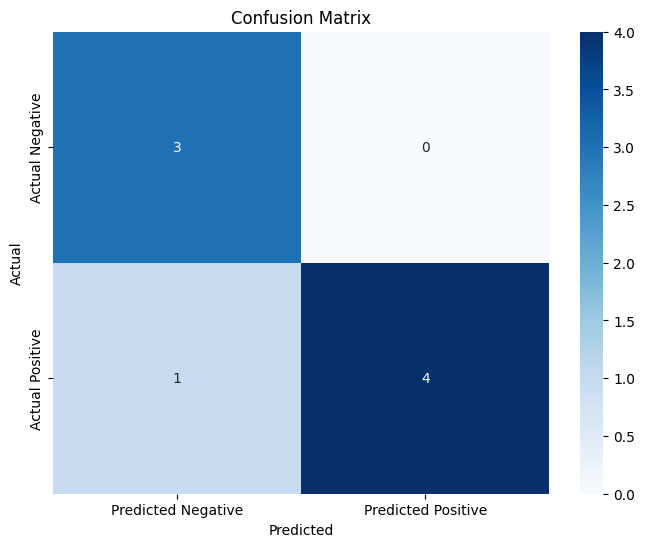

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### 1. Accuracy

Accuracy is the most intuitive performance measure and it is simply the ratio of correctly predicted observations to the total observations.

![\Large Accuracy = \frac{TP + TN}{TP + TN + FP + FN}](https://latex.codecogs.com/svg.latex?\Large&space;Accuracy=\frac{TP+TN}{TP+TN+FP+FN}) 



Where:
- **TP (True Positive)**: Correctly predicted positive cases
- **TN (True Negative)**: Correctly predicted negative cases
- **FP (False Positive)**: Incorrectly predicted positive cases
- **FN (False Negative)**: Incorrectly predicted negative cases

In [4]:
from sklearn.metrics import accuracy_score
# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 87.50%


### 2.Precision
Precision is the ratio of correctly predicted positive observations to the total predicted positives. It tells us how precise the model is when it predicts positive cases.

![\Large Precision=\frac{TP}{TP+FP}}](https://latex.codecogs.com/svg.latex?\Large&space;Precision=\frac{TP}{TP+FP}) 


In [10]:
from sklearn.metrics import precision_score

# Calculate precision
precision = precision_score(y_true, y_pred)
print(f"Precision: {precision:.2f}")

Precision: 1.00


### 3. Recall (Sensitivity or True Positive Rate)

Recall is the ratio of correctly predicted positive observations to all actual positives. It gives us an idea of how well the model can identify positive cases.

![\Large Recall=\frac{TP}{TP+FN}](https://latex.codecogs.com/svg.latex?\Large&space;Recall=\frac{TP}{TP+FN}) 





In [11]:
from sklearn.metrics import recall_score

# Calculate recall
recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2f}")

Recall: 0.80


### 4. F1-Score

F1-Score is the harmonic mean of precision and recall. It is a more balanced measure when precision and recall are both important.

![\LargeF1=2\times\frac{{Precision}\times{Recall}}{Precision+Recall}](https://latex.codecogs.com/svg.latex?\Large&space;F1=2\times\frac{{Precision}\times{Recall}}{Precision+Recall) 



In [12]:
from sklearn.metrics import f1_score

# Calculate F1-score
f1 = f1_score(y_true, y_pred)
print(f"F1-Score: {f1:.2f}")

F1-Score: 0.89


### Summary

- **Accuracy**: Best for balanced datasets where positive and negative classes are almost equal.
- **Precision**: Best when we want to minimize false positives.
- **Recall**: Best when we want to minimize false negatives (e.g., in medical diagnoses).
- **F1-Score**: Best when we need a balance between precision and recall, especially in cases of class imbalance.
